In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
prj_dir = Path("/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/credici/papers/journalEM/")
res_dir0 = Path(prj_dir, "./output/synthetic/s123/")
res_dir1 = Path(prj_dir, "./output/synthetic/s123b/")

prj_dir_name = str(prj_dir).split("/")[-1]
os.chdir(prj_dir)

In [3]:
files = [Path(res_dir0, f) for f in os.listdir(res_dir0) if f.endswith(".csv")]
files0= [f for f in files if any([s in str(f) for s in ["ccalp"]])]

files = [Path(res_dir1, f) for f in os.listdir(res_dir1) if f.endswith(".csv")]
files1 = [f for f in files if any([s in str(f) for s in ["ccalp"]])]

print(f"read {len(files0)} {len(files1)}")

read 304 424


In [4]:
df0 = pd.concat([pd.read_csv(f) for f in files0])
df1 = pd.concat([pd.read_csv(f) for f in files1])

def get_mark(t):
    infofile = "."+t.infoPath.split(prj_dir_name)[-1]
    return pd.read_csv(infofile)["markovianity"]

df0["markovianity"] = df0.apply(get_mark, axis=1)
df1["markovianity"] = df1.apply(get_mark, axis=1)




In [5]:
assert len(df0.modelID.unique()) == len(df0.modelID)
assert len(df1.modelID.unique()) == len(df1.modelID)

In [6]:
df0.columns

Index(['trueState', 'method', 'modelID', 'exactPath', 'modelPath', 'cause',
       'infoPath', 'time_pns', 'falseState', 'pns_u', 'effect', 'exact',
       'time_learn', 'pns_l', 'markovianity'],
      dtype='object')

In [7]:
cols = ["modelID", "pns_l", "pns_u"]


In [8]:
df = df0[["modelID", "pns_l", "pns_u", "markovianity"]].merge(df1[["modelID", "pns_l", "pns_u"]], on ="modelID", suffixes=("0", "1"),)

In [9]:
df

,modelID,pns_l0,pns_u0,markovianity,pns_l1,pns_u1
0,random_mc2_n9_mid3_d1000_05_mr098_r10_10_uai,0.301902,0.436716,1,0.301902,0.436716
1,random_mc2_n6_mid3_d1000_05_mr098_r10_91_uai,0.001417,0.103535,1,0.001417,0.103535
2,random_mc2_n9_mid3_d1000_05_mr098_r10_192_uai,0.363721,0.546557,1,0.363721,0.546557
3,random_mc2_n6_mid3_d1000_05_mr098_r10_146_uai,0.462975,0.494330,1,0.462975,0.494330
4,random_mc2_n5_mid3_d1000_05_mr098_r10_147_uai,0.071845,0.151473,1,0.071845,0.151473
...,...,...,...,...,...,...
294,random_mc2_n7_mid3_d1000_05_mr098_r10_22_uai,0.482110,0.644469,1,0.482110,0.644469
295,random_mc2_n6_mid3_d1000_05_mr098_r10_167_uai,0.009263,0.129746,1,0.009263,0.129746
296,random_mc2_n5_mid3_d1000_05_mr098_r10_121_uai,0.214340,0.279279,1,0.214340,0.279279
297,random_mc2_n7_mid3_d1000_05_mr098_r10_65_uai,0.152031,0.210286,1,0.152031,0.210286


In [10]:
lb_exact, ub_exact = 0.033535,0.150623
lb_approx, ub_approx = 0.034858, 0.150623

In [11]:
def max_diff(lb0, ub0, lb1, ub1):
    return max(np.abs(lb0-lb1), np.abs(ub0-ub1))


def rrmse(lb_exact, ub_exact, lb_approx, ub_approx):
    a,b, a_,b_ = lb_exact, ub_exact, lb_approx, ub_approx
    #if b_ - a_ == 0 and a==a_ and b==b_: return 0
    if (b_ - a_ == 0) or (b - a == 0): return np.NaN
    #if b_ - a_ == 0 and a==a_ and b==b_: return 0
    return math.sqrt(((a-a_)**2 + (b-b_)**2)/(2*((b_ - a_)**2)))

In [12]:
df["max_diff"] = df.apply(lambda t: max_diff(t["pns_l0"],t["pns_u0"],t["pns_l1"],t["pns_u1"]), axis=1)

In [13]:
np.abs

<ufunc 'absolute'>

In [14]:
df.max_diff.mean()


0.0015087929356640865

In [15]:
df["max_diff"].quantile([0.25, .5, .75], interpolation="nearest")

0.25    0.000000e+00
0.50    1.006140e-16
0.75    2.220446e-16
Name: max_diff, dtype: float64

<Axes: >

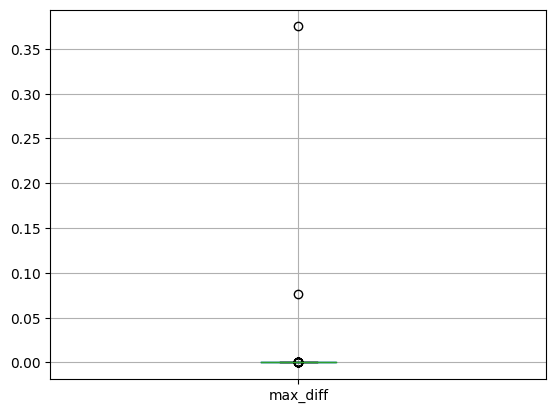

In [16]:
df.boxplot(column="max_diff")
#plt.ylim(0,0.01)

In [17]:
df.max_diff.hist()

<Axes: >

In [18]:
df.dropna().sort_values(by="max_diff")

,modelID,pns_l0,pns_u0,markovianity,pns_l1,pns_u1,max_diff
149,random_mc2_n8_mid3_d1000_05_mr098_r10_50_uai,0.332016,0.524380,0,0.332016,0.524380,0.000000e+00
260,random_mc2_n6_mid3_d1000_05_mr098_r10_24_uai,0.004820,0.065813,0,0.004820,0.065813,0.000000e+00
257,random_mc2_n7_mid3_d1000_05_mr098_r10_123_uai,0.010682,0.149952,0,0.010682,0.149952,0.000000e+00
254,random_mc2_n5_mid3_d1000_05_mr098_r10_153_uai,0.014386,0.118614,0,0.014386,0.118614,0.000000e+00
251,random_mc2_n5_mid3_d1000_05_mr098_r10_2_uai,0.000000,0.000000,1,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...
298,random_mc2_n8_mid3_d1000_05_mr098_r10_119_uai,0.031404,0.061024,1,0.031404,0.061024,9.020562e-16
59,random_mc2_n9_mid3_d1000_05_mr098_r10_118_uai,0.000018,0.317652,1,0.000018,0.317652,1.236475e-15
255,random_mc2_n8_mid3_d1000_05_mr098_r10_30_uai,0.024363,0.104759,1,0.024363,0.104759,5.082664e-08
122,random_mc2_n6_mid3_d1000_05_mr098_r10_100_uai,0.171265,0.302368,1,0.137606,0.378235,7.586706e-02
